# Logistic regression

To quote Daniela Witten, one of the authors of the book *An introduction to statistical learning* says

> "When we raise money it’s AI, when we hire it's machine learning, and when we do the work it's logistic regression."

This is one of the most important methods in statistics and machine learning to learn/compute a classification method. 

It relies on the sigmoid function
$$
\sigma(x)=\frac{1}{1+\mathrm{exp}(-x)}.
$$

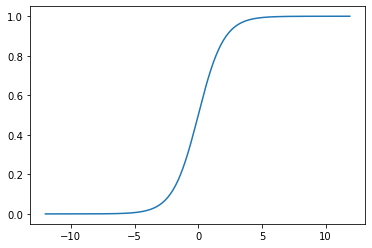

In [65]:
import matplotlib.pylab as plt
import numpy as np
import sklearn.datasets
x = np.arange(-12, 12, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)

# The Math: Defining a Likelihood Function

The logistic regression problem is based on a statistical viewpoint of machine learning. The basis is the assumption for a binary classification to put things into a category $0$ and $1$. We want to understand the binary outcome given explanatory variables. This can be achieved using a Bernoulli distribution
$$
0, 0, 1, 0, 1,0,1,1,0
$$

and a basic statistics course tells us that the probability density function of a Bernoulli distributed variable is
$$
P(Y=y\mid X=x,p)=p^y(1-p)^{1-y}
$$
with $y\in\left\lbrace0,1\right\rbrace$ the response, where $1$ has probability $p$ and $0$ probability $1-p$, and an observed input $x$. We now want to find the $p$ that generates the above numbers with $p^{y_1}(1-p)^{1-y_1}$ for the first number and $p^{y_2}(1-p)^{1-y_2}$ for the second and so on. 

If we assume independence of the variable the joint probability distribution is the product of such terms. It can be shown that an important function in this context is the sigmoid function
$$
\sigma(z)=\frac{1}{1+e^{-z}}
$$
used to model the probability density. Assuming a linear relationship
$$
y=\mathbf{X}^{T}\beta+\varepsilon
$$
with $\mathbf{X}=[x_1,x_2,\ldots,x_n]$ with $x_i\in\mathbb{R}^d$. 

The components in the error vector $\varepsilon$ 
are computed from
$$
\varepsilon_i=
\left\lbrace
\begin{array}{cc}
1-p_i&y_i=1\textrm{ with probability } p_i\\
-p_i&y_i=0\textrm{ with probability } 1-p_i\\
\end{array}
\right.
$$

We can write this also as
$$
\sigma(\beta^Tx)=\frac{1}{1+e^{-\beta^Tx}}
$$
where this represents the unknown probability $p$. Using the sigmoid or logistic function as probability $p$ we obtain now
$$
P(Y=y\mid X=x,p)=\sigma(\beta^Tx)^y(1-\sigma(\beta^Tx))^{1-y}.
$$ 
We now consider the likelihood function
$$
L(\beta)=
\prod_{i=1}^{n}P(Y=y_i\mid X=x_i)
$$
for independent variables or equivalently
$$
L(\beta)=
\prod_{i=1}^{n}\sigma(\beta^Tx_i)^{y_i}(1-\sigma(\beta^Tx_i))^{1-y_{i}}.
$$

We then obtain the log-likelihood function  as
$$
L_{\log}(\beta)=
\sum_{i=1}^{n}{y_i}\log(\sigma(\beta^Tx_i))+\left(1-y_{i}\right)\log(1-\sigma(\beta^Tx_i)).
$$
and we are interested in maximization of this quantity. We consider the gradient of $L_{\log}(\beta)$ via

\begin{align}
\frac{\partial L_{\log}(\beta)}{\partial \beta_j}&=\frac{\partial }{\partial \beta_j}\left(	\sum_{i=1}^{n}{y_i}\log(\sigma(\beta^Tx_i))+\left(1-y_{i}\right)\log(1-\sigma(\beta^Tx_i))\right)\\
&=\sum_{i=1}^{n}{y_i}\frac{\partial }{\partial \beta_j}\log(\sigma(\beta^Tx_i))+\left(1-y_{i}\right)\frac{\partial }{\partial \beta_j}\log(1-\sigma(\beta^Tx_i))\\
&=\sum_{i=1}^{n}{y_i}\frac{x_i^{(j)}\sigma'(\beta^Tx_i)}{\sigma(\beta^Tx_i)}+\left(1-y_{i}\right)\frac{(-x_i^{(j)}\sigma'(\beta^Tx_i)) }{(1-\sigma(\beta^Tx_i))}\\
&=\sum_{i=1}^{n}{y_i}\frac{x_i^{(j)}\sigma(\beta^Tx_i)(1-\sigma(\beta^Tx_i))}{\sigma(\beta^Tx_i)}+\left(1-y_{i}\right)\frac{(-x_i^{(j)}\sigma(\beta^Tx_i)(1-\sigma(\beta^Tx_i)) }{(1-\sigma(\beta^Tx_i))}\\
&=\sum_{i=1}^{n}{y_i}x_i^{(j)}(1-\sigma(\beta^Tx_i))+\left(1-y_{i}\right)(-x_i^{(j)}\sigma(\beta^Tx_i)\\
&=\sum_{i=1}^{n}{y_i}x_i^{(j)}(1-\sigma(\beta^Tx_i))+y_{i}x_i^{(j)}\sigma(\beta^Tx_i)-x_i^{(j)}\sigma(\beta^Tx_i)\\
&=\sum_{i=1}^{n}{y_i}x_i^{(j)}-x_i^{(j)}\sigma(\beta^Tx_i)\\
&=\sum_{i=1}^{n}x_i^{(j)}\left({y_i}-\sigma(\beta^Tx_i)\right)
\end{align}

and based on this the gradient is given as
$$
\nabla L_{\log}(\beta)=\mathbf{X}\left({y}-\mathbf{p}\right)
$$
with 
$\mathbf{p}_i=\sigma(\beta^Tx_i)$.

Now, we also need the Hessian matrix, which can be computed entry-wise via the following formula

\begin{align}
\frac{\partial^2 L_{\log}(\beta)}{\partial \beta_k\partial \beta_j}
&=\frac{\partial}{\partial \beta_k}\sum_{i=1}^{n}{y_i}x_i^{(j)}-x_i^{(j)}\sigma(\beta^Tx_i)\\
&=\sum_{i=1}^{n}-x_i^{(j)}x_i^{(k)}\sigma(\beta^Tx_i)(1-\sigma(\beta^Tx_i))\\
&=\sum_{i=1}^{n}-x_i^{(j)}x_i^{(k)}\mathbf{p}_i(1-\mathbf{p}_i):=(-\mathbf{X} D\mathbf{X}^T)_{kj}\\
\end{align}
with
$$
D:=
\begin{bmatrix}
\sigma(\beta^Tx_1)(1-\sigma(\beta^Tx_1))&&&\\
&\sigma(\beta^Tx_2)(1-\sigma(\beta^Tx_2))&&\\
&&\ddots&\\
&&&\sigma(\beta^Tx_n)(1-\sigma(\beta^Tx_n))\\
\end{bmatrix}.
$$	

This leads us to the following Newton iteration
$$
\beta=\bar{\beta}+(\mathbf{X}D\mathbf{X}^{T})^{-1}\mathbf{X}\left({y}-\mathbf{p}\right)
$$
where $\bar{\beta}$ indicates the iterate from the previous Newton iteration. 

If we decide to include a regularization term in the log-likelihood
$$
L_{\log}(\beta)=
\sum_{i=1}^{n}{y_i}\log(\sigma(\beta^Tx_i))+\left(1-y_{i}\right)\log(1-\sigma(\beta^Tx_i))-\frac{\lambda}{2}\Vert{\beta}\Vert^2
$$

\begin{align}
\frac{\partial L_{\log}(\beta)}{\partial \beta_j}&=\frac{\partial }{\partial \beta_j}\left(	\sum_{i=1}^{n}{y_i}\log(\sigma(\beta^Tx_i))+\left(1-y_{i}\right)\log(1-\sigma(\beta^Tx_i))\right)-\frac{\partial }{\partial \beta_j} \frac{\lambda}{2}\Vert{\beta}\Vert^2\\
&=\sum_{i=1}^{n}x_i^{(j)}\left({y_i}-\sigma(\beta^Tx_i)\right)-\frac{\partial }{\partial \beta_j} \frac{\lambda}{2}\sum_{i=1}^{n}\beta_i^2\\
&=\sum_{i=1}^{n}x_i^{(j)}\left({y_i}-\sigma(\beta^Tx_i)\right)-\lambda\beta_j
\end{align}
and as a result
$$
\nabla L_{\log}(\beta)=\mathbf{X}\left({y}-\mathbf{p}\right)-\lambda \beta
$$

Now, we also need the Hessian matrix, which can be computed entry-wise via the following formula

\begin{align}
\frac{\partial^2 L_{\log}(\beta)}{\partial \beta_k\partial \beta_j}
&=\frac{\partial}{\partial \beta_k}\left(\sum_{i=1}^{n}{y_i}x_i^{(j)}-x_i^{(j)}\sigma(\beta^Tx_i)-\lambda \beta_j\right)\\
&=\sum_{i=1}^{n}-x_i^{(j)}x_i^{(k)}\sigma(\beta^Tx_i)(1-\sigma(\beta^Tx_i))-\lambda \delta_{kj}\\
&=\sum_{i=1}^{n}-x_i^{(j)}x_i^{(k)}\mathbf{p}_i(1-\mathbf{p}_i):=(-\mathbf{X} D\mathbf{X}^T)_{kj}-\lambda \delta_{kj}\\
\end{align}
with
$$
D:=
\begin{bmatrix}
\sigma(\beta^Tx_1)(1-\sigma(\beta^Tx_1))&&&\\
&\sigma(\beta^Tx_2)(1-\sigma(\beta^Tx_2))&&\\
&&\ddots&\\
&&&\sigma(\beta^Tx_n)(1-\sigma(\beta^Tx_n))\\
\end{bmatrix}.
$$	

we obtain the following Newton scheme
$$
\beta=\bar{\beta}+(\mathbf{X}D\mathbf{X}^T+\lambda I)^{-1}\left(\mathbf{X}\left({y}-\mathbf{p}\right)-\lambda \bar{\beta}\right)
$$

Let's try this on the famous IRIS dataset [see here](https://en.wikipedia.org/wiki/Iris_flower_data_set)


In [91]:
iris = sklearn.datasets.load_iris()
x_train = iris.data[:, :2]
y_train = (iris.target != 0) * 1
x_train = x_train.T
y_train = y_train.T
print(y_train.shape)

(150,)


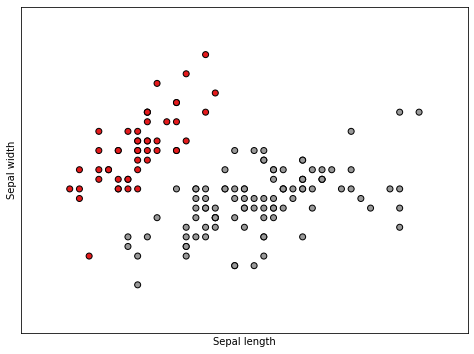

In [92]:
x_min, x_max = x_train.T[:, 0].min() - .5, x_train.T[:, 0].max() + .5
y_min, y_max = x_train.T[:, 1].min() - .5, x_train.T[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(x_train[0,:], x_train[1,:], c=y_train, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

intercept = np.ones((1,x_train.shape[1]))
x_train_i = np.concatenate((x_train,intercept), axis=0)
# x_train_i = x_train

### Let's define the sigmoid function and some training data

In [93]:
y_train = y_train[:,np.newaxis]
print(y_train)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [96]:
print(x_train_i.shape)

(3, 150)


In [98]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import linalg as LA

n=y_train.shape[0]

def sigmoid(z):
    return 1/(1+np.exp(-z))

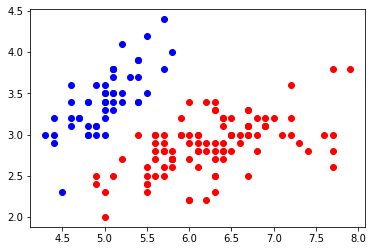

In [103]:
pos = np.flatnonzero(y_train == 1)
neg = np.flatnonzero(y_train == 0)

D = np.zeros((x_train_i.shape[1],x_train_i.shape[1]))

plt.plot(x_train_i[0, pos], x_train_i[1, pos], 'ro')
plt.plot(x_train_i[0, neg], x_train_i[1, neg], 'bo')  

Now the main loop!

In [104]:
lmda = 1e-2
theta = np.random.rand(x_train_i.shape[0],1)
I = np.identity(theta.shape[0])
# iterator 50 steps
for x in range(0, 50):
    h = sigmoid(x_train_i.T.dot(theta))
    error = y_train-h
    tmp = (-1)*y_train*np.log(h) - (1-y_train)*np.log((1-h)) # add the regularization in this objective function
    J = 1/n*np.sum(tmp) # evaluate the log-likelihood function but its not used further
    np.fill_diagonal(D, h*(1-h))
    H = 1/n*((x_train_i).dot((D.dot(x_train_i.T)))+lmda*I)
    dJ = 1/n*(x_train_i.dot(error)-lmda*theta)
    step = np.linalg.solve(H,dJ)
    print(LA.norm(step))
    if LA.norm(step)<1e-2:
        break
    #update theta
    theta = theta + .1*step

        
print(theta)

29.99478823090076
7.231943804354122
6.3873372606361905
5.795082269692554
5.363623020737249
5.04027181566039
4.792588266652513
4.599516692098444
4.446788647042965
4.324374516665336
4.224994422875631
4.143209952122904
4.074850144530657
4.016637841958841
3.9659404074961837
3.92060006404582
3.878816649876752
3.8390657999775204
3.8000416763968246
3.7606171133996624
3.7198163661107704
3.676797098632501
3.6308391436938368
3.581338113814782
3.5278022773319115
3.4698513260401
3.4072158225320224
3.3397362743804377
3.267360970884204
3.1901419514510843
3.108228750583675
3.0218598645924066
2.9313521798094753
2.8370888548339765
2.739506326409844
2.639081185392073
2.5363176374819325
2.4317361329463267
2.325863547419039
2.2192250605540367
2.112337653335366
2.005704965349225
1.8998131463106525
1.7951273109378239
1.6920882567148827
1.5911092102440705
1.4925725027269765
1.396826209720987
1.3041809005169949
1.214906711991938
[[  7.63301243]
 [ -9.16127903]
 [-12.61143099]]


[[-15.6679642   29.36680913]
 [-37.65503387   7.37973945]]


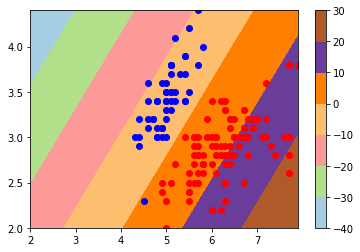

In [106]:
#plot boundary to separate data points
u = np.linspace(np.ndarray.min(x_train[0:]), np.ndarray.max(x_train[0:]), num=2)
v = np.linspace(np.ndarray.min(x_train[1:]), np.ndarray.max(x_train[1:]), num=2)
z = np.zeros((len(u), len(v)))
for i in range(0, len(u)):
    for j in range(0, len(v)):
        z[i, j] = theta[1]*v[i] + theta[0]*u[j]+theta[2]
        
print(z)
plt.contourf(u, v, z)
plt.colorbar();

# plot_x = [np.ndarray.min(x_train[1:]), np.ndarray.max(x_train[1:])]
# plot_y = np.subtract(np.multiply(-(theta[2][0]/theta[1][0]), plot_x), theta[0][0]/theta[1][0])
# plt.plot(plot_x, plot_y, 'b-')

plt.plot(x_train[0, pos], x_train[1, pos], 'ro')
plt.plot(x_train[0, neg], x_train[1, neg], 'bo')  
plt.show()

## Lets try the gradient scheme

In [107]:
lmda = 1e-2
theta = np.random.rand(x_train_i.shape[0],1)
#iterator 500 steps
for x in range(0, 140):
    h = sigmoid(x_train_i.T.dot(theta))
    error = y_train-h
    tmp = (-1)*y_train*np.log(h) - (1-y_train)*np.log((1-h))
    J = 1/n*np.sum(tmp)
    np.fill_diagonal(D, h*(1-h))
    step = 1/n*(x_train_i.dot(error)-lmda*theta)
    print(LA.norm(step))
    if LA.norm(step)<1e-2:
        break
    #update theta
    theta = theta + .1*step

1.0833254467443032
0.3967390410267632
0.253880339708813
0.25048477189513413
0.24875367042035454
0.24703230127762024
0.24531647830518077
0.24360661720059154
0.2419031435733602
0.2402064686980325
0.23851698862620221
0.2368350840079264
0.23516111998892622
0.23349544615354997
0.23183839651017277
0.2301902895168571
0.22855142814505544
0.22692209997909155
0.22530257734910977
0.22369311749517018
0.22209396276014948
0.22050534080913142
0.21892746487298323
0.2173605340138604
0.21580473341043416
0.2142602346606768
0.2127271961001355
0.21120576313367662
0.20969606857877435
0.20819823301850546
0.20671236516249464
0.205238562214157
0.2037769102426727
0.20232748455822058
0.2008903500891137
0.19946556175954258
0.19805316486676203
0.19665319545662385
0.19526568069645572
0.19389063924438601
0.19252808161428037
0.19117801053555344
0.18984042130718579
0.18851530214536463
0.18720263452422098
0.18590239350921883
0.184614548082806
0.18333906146199952
0.1820758914076327
0.18082499052504308
0.1795863065560325

# Speed up with Newton?

In [111]:
lmda = 1e-2
#iterator 500 steps
for x in range(0, 100):
    h = sigmoid(x_train_i.T.dot(theta))
    # print(h)
    error = y_train-h
    tmp = (-1)*y_train*np.log(h) - (1-y_train)*np.log((1-h))
    J = 1/n*np.sum(tmp)
    np.fill_diagonal(D, h*(1-h))
    H = 1/n*((x_train_i).dot((D.dot(x_train_i.T)))+lmda*I)
    dJ = 1/n*(x_train_i.dot(error)-lmda*theta)
    step = np.linalg.solve(H,dJ)
    print(LA.norm(step))
    if LA.norm(step)<1e-2:
        break
    #update theta
    theta = theta + .3*step

0.007267524438509921


(3, 1)
[[-16.95298391  31.84029078]
 [-41.18466395   7.60861074]]


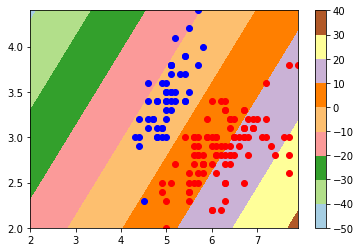

In [112]:
#plot boundary to separate data points
print(theta.shape)
u = np.linspace(np.ndarray.min(x_train[0:]), np.ndarray.max(x_train[0:]), num=2)
v = np.linspace(np.ndarray.min(x_train[1:]), np.ndarray.max(x_train[1:]), num=2)
z = np.zeros((len(u), len(v)))
for i in range(0, len(u)):
    for j in range(0, len(v)):
        z[i, j] = theta[1]*v[i] + theta[0]*u[j]+theta[2]
        
print(z)
plt.contourf(u, v, z)
plt.colorbar();

# plot_x = [np.ndarray.min(x_train[1:]), np.ndarray.max(x_train[1:])]
# plot_y = np.subtract(np.multiply(-(theta[2][0]/theta[1][0]), plot_x), theta[0][0]/theta[1][0])
# plt.plot(plot_x, plot_y, 'b-')

plt.plot(x_train[0, pos], x_train[1, pos], 'ro')
plt.plot(x_train[0, neg], x_train[1, neg], 'bo')  
plt.show()

In [134]:
import numpy as np
import pylab as pl
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train_i.T,np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
print(logreg.coef_)
print(logreg.intercept_)
theta=logreg.coef_
theta=theta.T

[[ 3.38822960e+00 -3.16424935e+00  2.82754169e-04]]
[-8.32412399]


(3, 1)


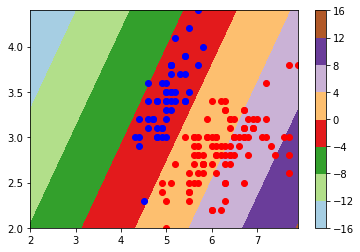

In [136]:
#plot boundary to separate data points
print(theta.shape)
u = np.linspace(np.ndarray.min(x_train[0:]), np.ndarray.max(x_train[0:]), num=2)
v = np.linspace(np.ndarray.min(x_train[1:]), np.ndarray.max(x_train[1:]), num=2)
z = np.zeros((len(u), len(v)))
for i in range(0, len(u)):
    for j in range(0, len(v)):
        z[i, j] = theta[1]*v[i] + theta[0]*u[j]+logreg.intercept_
        
plt.contourf(u, v, z)
plt.colorbar();

# plot_x = [np.ndarray.min(x_train[1:]), np.ndarray.max(x_train[1:])]
# plot_y = np.subtract(np.multiply(-(theta[2][0]/theta[1][0]), plot_x), theta[0][0]/theta[1][0])
# plt.plot(plot_x, plot_y, 'b-')

plt.plot(x_train[0, pos], x_train[1, pos], 'ro')
plt.plot(x_train[0, neg], x_train[1, neg], 'bo')  
plt.show()